# hp refinement example using MPT-Calculator

In [1]:
from time import time
import numpy as np
from matplotlib import pyplot as plt
import os
root_dir = os.path.dirname(os.getcwd())
os.chdir(root_dir)

In [2]:
from runner import main

## $p$ - Refinement

In this example, we wish to explore the effect of changing the polynomial order of the $\boldsymbol{H}(curl)$ discretisation. We expect that increasing the order $p$ from $p=0\rightarrow p=1\rightarrow p=2\rightarrow p=3$ will result in a more accurate simulation at the cost of an increased computational time.

For control over the order we want to specify $p$ as an input argument
```python
main(order=p)
```

which can be done iteratively

sphere.geo
generating mesh
 mesh contains 8693 elements
 solved theta0 problems    
manually closed pool
 SVD complete                
manually closed poolder model
 reduced order systems solved          
 frequency sweep complete
sphere.geo
generating mesh
 mesh contains 8693 elements
 solved theta0 problems    
manually closed pool
 SVD complete                
manually closed poolder model
 reduced order systems solved          
 frequency sweep complete
sphere.geo
generating mesh
 mesh contains 8693 elements
 solved theta0 problems    
manually closed pool
 SVD complete                
manually closed poolder model
 reduced order systems solved          
 frequency sweep complete
sphere.geo
generating mesh
 mesh contains 8693 elements
 solved theta0 problems    
manually closed pool
 SVD complete                
manually closed poolder model
 reduced order systems solved          
 frequency sweep complete


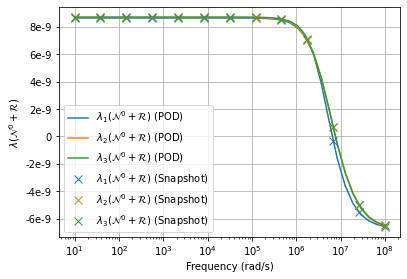

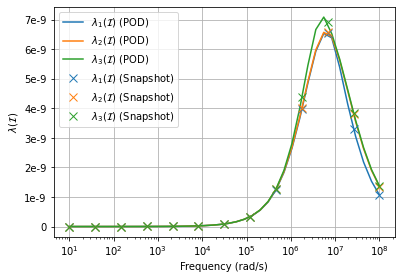

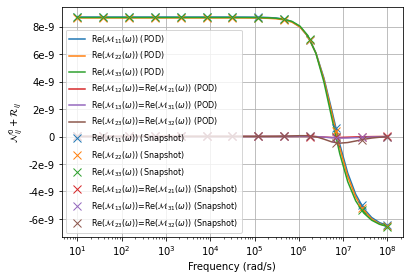

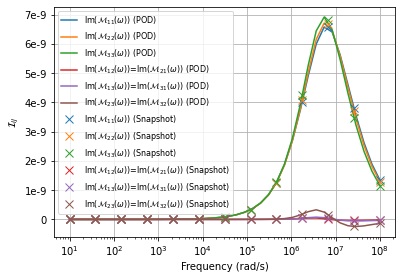

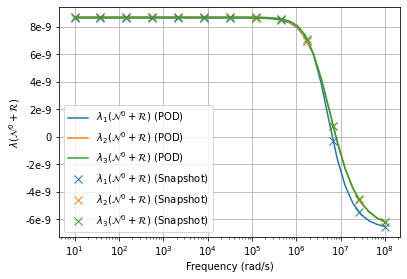

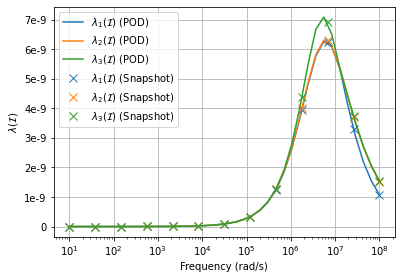

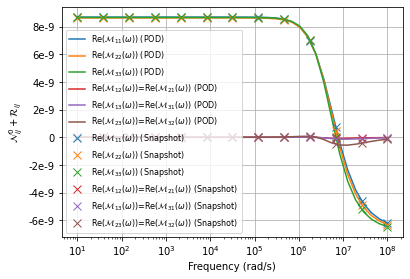

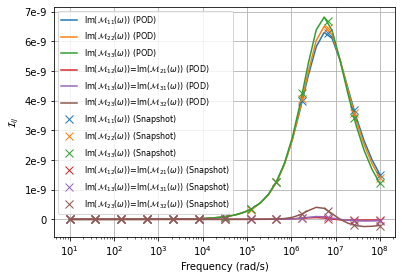

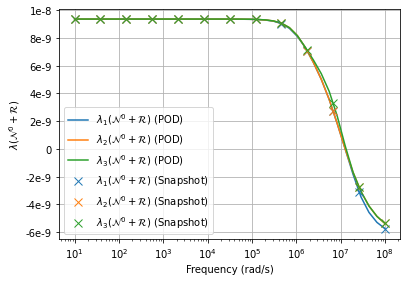

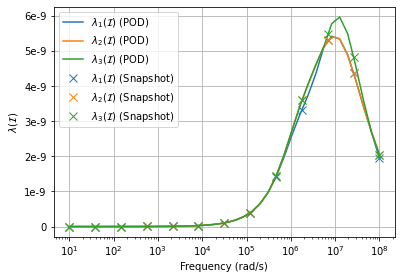

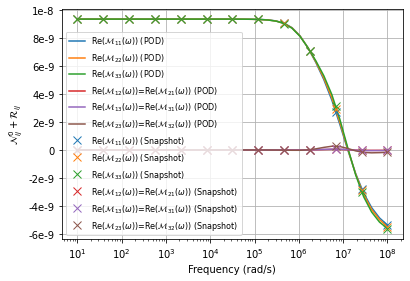

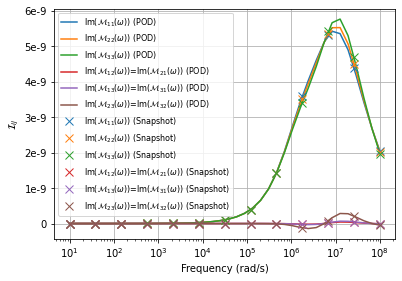

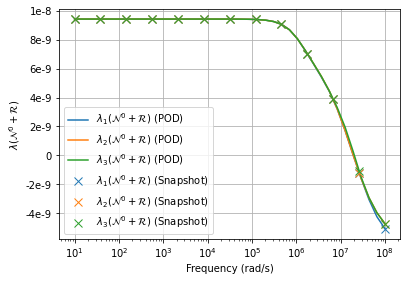

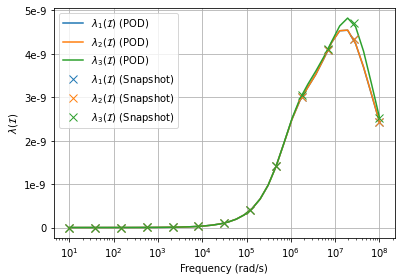

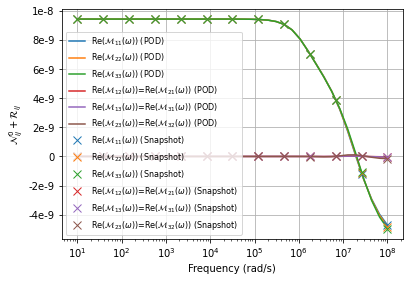

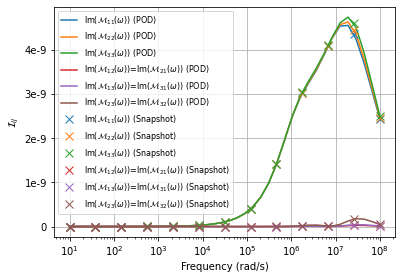

In [3]:
comparison_eig_p = np.zeros((40,4), dtype=complex)
comparison_ndofs_p = np.zeros(4)
start_time = time()
for p in [0,1,2,3]:
    TensorArray, EigenValues, N0, elements, Array, ndofs, EddyCurrentTest = main(use_POD=True, order=p)
    comparison_eig_p[:,p] = EigenValues[:,0]
    comparison_ndofs_p[p] = ndofs[1]
stop_time = time()

Plotting the first eigenvalue for the different $p$, shows that the solutions are in agreement upto $\sim 10^6$ rad/s, after which the solutions begin to diverge.

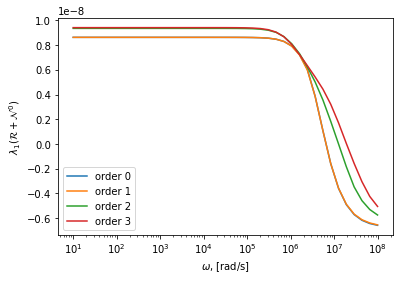

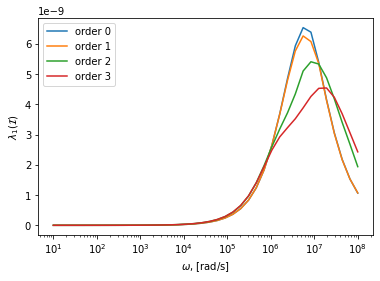

In [4]:
plt.figure()
for p in [0,1,2,3]:
    plt.semilogx(Array, comparison_eig_p[:,p].real, label=f'order {p}')
plt.legend();
plt.xlabel('$\omega$, [rad/s]');
plt.ylabel('$\lambda_1(\mathcal{R} + \mathcal{N}^0)$');

plt.figure()
for p in [0,1,2,3]:
    plt.semilogx(Array, comparison_eig_p[:,p].imag, label=f'order {p}')
plt.legend();
plt.xlabel('$\omega$, [rad/s]');
plt.ylabel('$\lambda_1(\mathcal{I})$');

Since orders 2 and 3 disagree

## $h$ - Refinement

Similarly to refining $p$, we can also increase the density of the mesh, to provide finer spatial resolution. In this example, we reduce the maximum element size in the mesh and observe that this provides a more accurate solution.

To set a maximum element size for a quasi-uniform mesh, we use the $\texttt{h}$ argument in $\texttt{main}$. For example, to set the max element size to 1 over the entire mesh we would use
```python
main(h=1)
```
which can also be done iterativly.

In [5]:
comparison_eig_h = np.zeros((40,4), dtype=complex)
comparison_ndofs_h = np.zeros(4)
h_array = [100,50,25,12.5]
for n, h in enumerate(h_array):
    print(f'Solving for h={h}')
    TensorArray, EigenValues, N0, elements, Array, ndofs, EddyCurrentTest = main(use_POD=True, order=0, h=h)
    comparison_eig_h[:,n] = EigenValues[:,0]
    comparison_ndofs_h[n] = ndofs[1]

SyntaxError: EOL while scanning string literal (<ipython-input-5-e7395a755b44>, line 5)

In [ ]:
As before, plotting the first eigenvalue shows the effect of refining the mesh. 

In [ ]:
plt.figure()
for h in [0,1,2,3]:
    plt.semilogx(Array, comparison_eig_h[:,h].real, label=f'h={h_array[h]}')
plt.legend();
plt.xlabel('$\omega$, [rad/s]');
plt.ylabel('$\lambda_1(\mathcal{I})$');

plt.figure()
for h in [0,1,2,3]:
    plt.semilogx(Array, comparison_eig_h[:,h].imag, label=f'h={h_array[h]}')
plt.legend();
plt.xlabel('$\omega$, [rad/s]');
plt.ylabel('$\lambda_1(\mathcal{I})$');


In [ ]:
comparison_ndofs_h
